In [29]:
# imports

# make notebook span width of browser window, for convenience
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
np.warnings.filterwarnings('ignore')


# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
# for jupyter notebooks to show plots inline
%matplotlib inline 
#%matplotlib

from astropy.table import Table
from astropy.io import fits, ascii
from astropy import units as u
from astropy.coordinates import SkyCoord



import pandas as pd 
pd.set_option('display.max_columns', 500) # convenient for 



In [9]:
# define paths

version = 'v2.0'
root = '/home/gogreen/Data/Releases/'
#root = '/Users/mbalogh/projects/GOGREEN/data/Data/Releases/'
dirr  =  root + version + '/'
specdir = dirr + 'SPECTROSCOPY/'
catdir = dirr + 'CATS/'
photdir = dirr + 'PHOTOMETRY/'
imdir = photdir + 'IMAGES/'
oneddir = specdir + 'OneD/'
twoddir = specdir + 'TwoD/'

In [10]:
# define cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Helpful information


**Brief introduction to ipython notebooks/jupyter**

See also: http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/
Short video: https://www.youtube.com/watch?v=jZ952vChhuI

To open from terminal, this will run in your browser (does not require internet):
    
    > jupyter notebook

A 'file directory' will open, and you can navigate to where you have a notebook, or make a new notebook. 

To close, close the associated terminal window. Closing the browser will not end the session.

Executing basics:
    - There are two modes, command mode and edit mode. 
        - If you have selected a cell and see a cursor, you are in edit mode (the cell will be outlined in green). 
        - If the cell is outlined in blue, you are in command mode. 
        - To toggle between modes, hit escape, or click on the margin of the cell.

    -  **************** Run a cell, in either mode: shift + enter ****************
        - Notice that the cell number will change. Jupyter doesn't care what order the cells are in, it cares what order you execute them in. Pay attention to where you have defined variables.
        
    - Command mode has some shortcuts for the keys:
        - x - cut. This is also delete, if you don't remember to paste. There are limited undo's under the Edit menu
        - c - copy
        - v - paste
        
    See tool bar for more options. Keyboard shortcuts listed in Help>Keyboard shortcuts (shortcut 'h')
    
Helpful tips:
    You can check the requirements for a package by typing (for example)
    > help(np.arange)
    or 
    > np.arange? # this makes a popout window
    
    you can also use the tab key to see available options 
    > np.arange(<tab>
    
There are also multiple types of cells. This cell is a 'Raw NBConvert' type cell, which is not executable.
    - code (y) - executable in python
    - markdown (m) - renders markdown type, usefule for headings,tables,equations
    - raw NBConvert (r) - non executable
    - headings (1-6) - markdown with quick heading setup
    
    - you may accidentally switch cell types while in command mode. You can check the cell type from the drop down menu in the tool bar.




**Brief introduction to pandas:**
See also: https://pandas.pydata.org/ 

https://pandas.pydata.org/pandas-docs/stable/10min.html

Pandas uses Series and DataFrame structures. It is much like astropy.table.Table, or numpy tables, but has convenient indexing which helps agaist misaligning columns/rows.

When retrieve elements in a column, 

    column = table['column_header'] 
        (alternatively, table.column_header, if column_header is not also a key word)
    this is a Series, which retains the indexing of the dataframe
    
    
    to convert to an array:
    column = table['column_header'].values
    
To access a specific row and column:

    object = table.loc[row_index,'column_header']
    
To access all indices in the dataframe:

    indices = table.index
    
Convenient functions:

    table.query('column_header > 0')
    returns a 'dataframe' slice, maintaining the index structure of the parent dataframe
    
    equivalent to, but cleaner than: table[table['column_header'] > 0]

# Read in three main tables


These first scripts only need information in the catalogues.  There is no need for the SPECTROSCOPY/ (~300Mb) or PHOTOMETRY/ (~35 Gb) directories.
1.  Clusters.fits contains information about each of the 26 clusters
2.  Redshift_catalogue.fits is the redshift catalogue, with one entry for each spectrum
3.  Photo.fits is the merged photometric catalogue.  

In [11]:
clusters = catdir + 'Clusters.fits'

# read in fits data table with astropy.table.Table and immediately convert to pandas Dataframe
cluster_table = Table( fits.getdata( clusters ) ).to_pandas() 
cluster_table['cluster'] = cluster_table['cluster'].str.rstrip().values # remove unnecessary spaces

print(cluster_table.columns)
cluster_table

Index(['cluster', 'fullname', 'cluster_id', 'RA_Best', 'DEC_Best', 'RA_GMOS',
       'DEC_GMOS', 'PA_deg', 'Redshift', 'vdisp', 'vdisp_err', 'gogreen_m1',
       'gogreen_m2', 'gogreen_m3', 'gogreen_m4', 'gogreen_m5', 'gogreen_m6',
       'gclass_m1', 'gclass_m2', 'gclass_m3', 'gclass_m4', 'gclass_m5',
       'Kphot_cat', 'photoz_cat', 'stelmass_cat', 'IMAGE_U', 'IMAGE_B',
       'IMAGE_G', 'IMAGE_V', 'IMAGE_R', 'IMAGE_I', 'IMAGE_Z', 'IMAGE_J',
       'IMAGE_J1', 'IMAGE_Y', 'IMAGE_K', 'IMAGE_IRAC1', 'Preimage'],
      dtype='object')


,cluster,fullname,cluster_id,RA_Best,DEC_Best,RA_GMOS,DEC_GMOS,PA_deg,Redshift,vdisp,vdisp_err,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,Kphot_cat,photoz_cat,stelmass_cat,IMAGE_U,IMAGE_B,IMAGE_G,IMAGE_V,IMAGE_R,IMAGE_I,IMAGE_Z,IMAGE_J,IMAGE_J1,IMAGE_Y,IMAGE_K,IMAGE_IRAC1,Preimage
0,COSMOS-125,COSMOS-125,14,150.620804,2.167500,150.627197,2.159200,270.0,1.40400,NaN,400.0,GS2015ALP001-02,GS2016ALP001-02,GS2019ALP001-02,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-125_pseudo
1,COSMOS-221,COSMOS-221,14,150.561996,2.503100,150.570206,2.498600,90.0,1.19600,200.0,50.0,GS2014BLP001-05,GS2015ALP001-01,GS2016ALP001-01,GS2019ALP001-03,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-221_pseudo
2,COSMOS-28,COSMOS-28,14,149.469193,1.668500,149.459305,1.675030,78.0,1.31600,285.0,75.0,GN2015BLP004-03,GN2019ALP004-01,GN2019ALP004-02,GN2019ALP004-03,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-28_pseud
3,COSMOS-63,COSMOS-63,14,150.358994,1.935200,150.361465,1.928342,165.0,1.17220,NaN,70.0,GN2015BLP004-02,,,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-63_pseudo
4,SPT0205,SPT-CL J0205-5829,1,31.451000,-58.480301,31.438959,-58.482900,90.0,1.32270,678.0,57.0,GS2014BLP001-06,GS2016BLP001-09,GS2016BLP001-02,GS2017BLP001-03,GS2017BLP001-04,GS2017BDD010-01,,,,,,SPTCL-0205_totalall_FOURSTARKs.cat,SPTCL-0205_totalall_Ks.zout,SPTCL-0205_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20140928S0161_add
5,SPT0546,SPT-CL J0546-5345,2,86.640297,-53.761002,86.656197,-53.758000,0.0,1.06690,977.0,68.0,GS2014BLP001-09,GS2014BLP001-10,GS2015BLP001-16,GS2017BLP001-12,GS2015BLP001-15,GS2017BLP001-13,,,,,,SPTCL-0546_totalall_FOURSTARKs.cat,SPTCL-0546_totalall_Ks.zout,SPTCL-0546_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20141001S0139_add
6,SPT2106,SPT-CL J2106-5844,3,316.519104,-58.741100,316.519135,-58.741100,100.0,1.13066,1055.0,83.0,GS2018ALP001-01,GS2018ALP001-02,GS2018BLP001-04,GS2019ALP001-01,GS2018BLP001-05,,,,,,,SPTCL-2106_totalall_HAWKIKs.cat,SPTCL-2106_totalall_Ks.zout,SPTCL-2106_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20150411S0405_add
7,SXDF49,SXDF49XGG,13,34.499599,-5.064900,34.537060,-5.069708,73.0,1.09100,255.0,50.0,GN2015BLP004-01,GS2018BLP001-01,GS2018BLP001-02,GS2018BLP001-03,GN2018BLP004-01,GS2014BLP001-07,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF49_pseudo
8,SXDF64,SXDF64XGG,13,34.331902,-5.206700,34.323750,-5.171400,180.0,0.91600,530.0,80.0,GS2014BLP001-08,GS2015BLP001-02,,,,,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF64_pseudo
9,SXDF76,SXDF76XGG,13,34.746101,-5.304100,34.736118,-5.321800,350.0,1.45900,520.0,180.0,GS2014BLP001-02,GS2015BLP001-03,GN2018BLP004-02,GN2018BLP004-03,GN2018BLP004-04,,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF76_pseudo


In [12]:
photfile = catdir+'Photo.fits'

phot_table = Table( fits.getdata(photfile) ).to_pandas()
print (phot_table.columns)
phot_table.head(5)

Index(['Cluster', 'cPHOTID', 'SPECID', 'ra', 'dec', 'zspec',
       'Redshift_Quality', 'zphot', 'zphot_l68', 'zphot_u68', 'UMINV', 'VMINJ',
       'Star', 'K_flag', 'totmask', 'Mstellar', 'u_tot', 'g_tot', 'r_tot',
       'i_tot', 'z_tot', 'y_tot', 'V_tot', 'B_tot', 'J_tot', 'H_tot', 'K_tot',
       'Ks_tot', 'IRAC1_tot', 'IRAC2_tot', 'IRAC3_tot', 'IRAC4_tot',
       'IA484_tot', 'IA527_tot', 'IA624_tot', 'IA679_tot', 'IA738_tot',
       'IA767_tot', 'IB427_tot', 'IB464_tot', 'IB505_tot', 'IB574_tot',
       'IB709_tot', 'IB827_tot', 'fuv_tot', 'nuv_tot', 'mips24_tot', 'eu_tot',
       'eg_tot', 'er_tot', 'ei_tot', 'ez_tot', 'ey_tot', 'eV_tot', 'eB_tot',
       'eJ_tot', 'eH_tot', 'eK_tot', 'eKs_tot', 'eIRAC1_tot', 'eIRAC2_tot',
       'eIRAC3_tot', 'eIRAC4_tot', 'eIA484_tot', 'eIA527_tot', 'eIA624_tot',
       'eIA679_tot', 'eIA738_tot', 'eIA767_tot', 'eIB427_tot', 'eIB464_tot',
       'eIB505_tot', 'eIB574_tot', 'eIB709_tot', 'eIB827_tot', 'efuv_tot',
       'enuv_tot', 'emips24_tot

,Cluster,cPHOTID,SPECID,ra,dec,zspec,Redshift_Quality,zphot,zphot_l68,zphot_u68,UMINV,VMINJ,Star,K_flag,totmask,Mstellar,u_tot,g_tot,r_tot,i_tot,z_tot,y_tot,V_tot,B_tot,J_tot,H_tot,K_tot,Ks_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,fuv_tot,nuv_tot,mips24_tot,eu_tot,eg_tot,er_tot,ei_tot,ez_tot,ey_tot,eV_tot,eB_tot,eJ_tot,eH_tot,eK_tot,eKs_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,efuv_tot,enuv_tot,emips24_tot
0,SpARCS0219,105000001,-1,34.953503,-5.606190,NaN,NaN,0.2705,0.256,0.285,2.425,1.270,1.0,0.0,NaN,4.466836e+10,4.072889,NaN,134.283570,268.383854,332.731829,NaN,NaN,NaN,423.165405,NaN,NaN,370.481,155.169071,105.532459,67.386604,15.839884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.210780,NaN,0.382283,0.365264,0.989747,NaN,NaN,NaN,0.515821,NaN,NaN,0.654595,1.251585,1.955929,8.174579,9.500788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SpARCS0219,105000002,-1,34.993313,-5.606283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.000000e-01,NaN,NaN,NaN,-398.447391,-294.026696,NaN,NaN,NaN,-8.243739,NaN,NaN,63.202,52.210348,30.227043,-195.101826,-32.974957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1085.425652,-2940.266957,NaN,NaN,NaN,-1071.686087,NaN,NaN,-1373.956522,-384.707826,-1203.585913,-5333.699217,-5322.707565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SpARCS0219,105000003,-1,34.962978,-5.606588,NaN,NaN,0.8435,0.814,0.873,3.133,1.087,0.0,2.0,NaN,2.951209e+10,-0.100217,NaN,0.169115,2.837380,7.268203,NaN,NaN,NaN,23.549628,NaN,NaN,26.962,26.478455,23.669888,21.849705,0.299397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201686,NaN,0.338231,0.349505,0.945793,NaN,NaN,NaN,0.487303,NaN,NaN,0.626353,1.097371,1.726229,7.428549,8.871667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SpARCS0219,105000004,-1,34.911652,-5.606985,NaN,NaN,1.5982,1.489,1.713,0.919,0.568,0.0,0.0,NaN,1.995262e+10,5.103195,NaN,9.021426,10.505729,12.442136,NaN,NaN,NaN,26.366510,NaN,NaN,41.096,47.815620,59.173946,25.154707,31.234364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.332368,NaN,0.557388,0.575967,1.560686,NaN,NaN,NaN,0.825760,NaN,NaN,1.040457,1.688679,2.347222,14.293902,11.028022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SpARCS0219,105000005,-1,34.904476,-5.607291,NaN,NaN,3.0948,2.894,3.314,0.759,1.711,0.0,0.0,NaN,1.479108e+10,0.420350,NaN,1.375549,2.402898,2.558177,NaN,NaN,NaN,3.425541,NaN,NaN,6.895,15.273774,27.394920,49.367635,37.782906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.252524,NaN,0.423487,0.617978,1.675127,NaN,NaN,NaN,0.622683,NaN,NaN,0.787373,1.118320,1.512006,12.522675,10.690701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
zcatfile = catdir + 'Redshift_catalogue.fits'

# read in fits data table with astropy.table.Table and immediately convert to pandas Dataframe
redshift_table = Table( fits.getdata( zcatfile ) ).to_pandas() 
redshift_table['Cluster'] = redshift_table['Cluster'].str.rstrip().values # remove unnecessary spaces

print (redshift_table.columns)
redshift_table.head(5)

Index(['Cluster', 'SPECID', 'RA(J2000)', 'DEC(J2000)', 'OBJClass', 'Redshift',
       'Redshift_Quality', 'EXTVER', 'Spec_Flag', 'SNR_8500_VAR',
       'SNR_8500_RMS', 'D4000', 'eD4000', 'EWOII', 'eEWOII', 'EWHdelta',
       'eEWHdelta', 'EWOII_model', 'eEWOII_model', 'F_OII', 'eF_OII',
       'SFR_OII', 'eSFR_OII', 'delta_BIC', 'member_Clean', 'member_EM',
       'member'],
      dtype='object')


,Cluster,SPECID,RA(J2000),DEC(J2000),OBJClass,Redshift,Redshift_Quality,EXTVER,Spec_Flag,SNR_8500_VAR,SNR_8500_RMS,D4000,eD4000,EWOII,eEWOII,EWHdelta,eEWHdelta,EWOII_model,eEWOII_model,F_OII,eF_OII,SFR_OII,eSFR_OII,delta_BIC,member_Clean,member_EM,member
0,COSMOS-125,114080478,150.605179,2.118631,1,1.41478,2,1,0.0,2.855579,1.827386,NaN,NaN,NaN,NaN,NaN,NaN,4.155094,1.096318,6.318261e-18,1.558597e-18,3.228765,0.796476,7.636033,-1.0,-1.0,-1.0
1,COSMOS-125,114080570,150.594482,2.120006,1,1.34553,4,2,0.0,3.217247,2.300130,1.364112,0.076498,11.551618,4.967136,5.405303,4.758426,11.549834,1.890590,1.721636e-17,2.658499e-18,4.880185,0.753583,71.387192,-1.0,-1.0,-1.0
2,COSMOS-125,114081196,150.587677,2.128183,3,0.96172,4,3,0.0,10.048548,7.505558,1.206696,0.030443,3.372206,1.760464,3.249191,1.707648,4.091792,0.768290,2.271857e-17,4.008346e-18,3.261066,0.575365,25.215458,-1.0,-1.0,-1.0
3,COSMOS-125,114081258,150.596909,2.129453,1,0.72447,3,4,0.0,4.754746,3.284939,1.433353,0.130532,1.186794,38.480305,-1.591362,6.184247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
4,COSMOS-125,114081508,150.609695,2.134149,1,1.13177,4,5,0.0,2.862871,1.829309,1.294710,0.089390,67.153458,35.867435,2.344702,5.377402,42.830364,3.741641,5.937891e-17,4.418138e-18,5.096052,0.379176,297.244873,-1.0,-1.0,-1.0


In [40]:
# Merge photo and spec tables to return a table that has photometric information (if available) 
# for every object in the redshift catalogue

# this way avoids duplicate columns (ie dont need to specify suffixes)
merge_col = ['SPECID']
cols_to_use = phot_table.columns.difference(redshift_table.columns).tolist() + merge_col
matched_table = pd.merge(redshift_table, phot_table[cols_to_use], how='left', \
                         left_on=['SPECID'], right_on=merge_col )
merge_col = ['cluster']
#cols_to_use = cluster_table.columns.difference(matched_table.columns).tolist() 
#matched_table = pd.merge(matched_table, cluster_table[cols_to_use], how='left', \
#                         left_on=['Cluster'], right_on=merge_col )

# Here attach suffix _c to distinguish between galaxy values (Redshift) and cluster values (Redshift_c)
matched_table = pd.merge(matched_table, cluster_table, how='left', \
                         left_on=['Cluster'], right_on=merge_col, suffixes=['','_c'] )
print (matched_table.columns.values)
display(matched_table.head(20))


['Cluster' 'SPECID' 'RA(J2000)' 'DEC(J2000)' 'OBJClass' 'Redshift'
 'Redshift_Quality' 'EXTVER' 'Spec_Flag' 'SNR_8500_VAR' 'SNR_8500_RMS'
 'D4000' 'eD4000' 'EWOII' 'eEWOII' 'EWHdelta' 'eEWHdelta' 'EWOII_model'
 'eEWOII_model' 'F_OII' 'eF_OII' 'SFR_OII' 'eSFR_OII' 'delta_BIC'
 'member_Clean' 'member_EM' 'member' 'B_tot' 'H_tot' 'IA484_tot'
 'IA527_tot' 'IA624_tot' 'IA679_tot' 'IA738_tot' 'IA767_tot' 'IB427_tot'
 'IB464_tot' 'IB505_tot' 'IB574_tot' 'IB709_tot' 'IB827_tot' 'IRAC1_tot'
 'IRAC2_tot' 'IRAC3_tot' 'IRAC4_tot' 'J_tot' 'K_flag' 'K_tot' 'Ks_tot'
 'Mstellar' 'Star' 'UMINV' 'VMINJ' 'V_tot' 'cPHOTID' 'dec' 'dz_l' 'dz_u'
 'eB_tot' 'eH_tot' 'eIA484_tot' 'eIA527_tot' 'eIA624_tot' 'eIA679_tot'
 'eIA738_tot' 'eIA767_tot' 'eIB427_tot' 'eIB464_tot' 'eIB505_tot'
 'eIB574_tot' 'eIB709_tot' 'eIB827_tot' 'eIRAC1_tot' 'eIRAC2_tot'
 'eIRAC3_tot' 'eIRAC4_tot' 'eJ_tot' 'eK_tot' 'eKs_tot' 'eV_tot' 'efuv_tot'
 'eg_tot' 'ei_tot' 'emips24_tot' 'enuv_tot' 'er_tot' 'eu_tot' 'ey_tot'
 'ez_tot' 'fuv_tot' 

,Cluster,SPECID,RA(J2000),DEC(J2000),OBJClass,Redshift,Redshift_Quality,EXTVER,Spec_Flag,SNR_8500_VAR,SNR_8500_RMS,D4000,eD4000,EWOII,eEWOII,EWHdelta,eEWHdelta,EWOII_model,eEWOII_model,F_OII,eF_OII,SFR_OII,eSFR_OII,delta_BIC,member_Clean,member_EM,member,B_tot,H_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,J_tot,K_flag,K_tot,Ks_tot,Mstellar,Star,UMINV,VMINJ,V_tot,cPHOTID,dec,dz_l,dz_u,eB_tot,eH_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eJ_tot,eK_tot,eKs_tot,eV_tot,efuv_tot,eg_tot,ei_tot,emips24_tot,enuv_tot,er_tot,eu_tot,ey_tot,ez_tot,fuv_tot,g_tot,i_tot,lMstellar,mips24_tot,nuv_tot,r_tot,ra,totmask,u_tot,y_tot,z_tot,zphot,zphot_l68,zphot_u68,zspec,cluster,fullname,cluster_id,RA_Best,DEC_Best,RA_GMOS,DEC_GMOS,PA_deg,Redshift_c,vdisp,vdisp_err,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,Kphot_cat,photoz_cat,stelmass_cat,IMAGE_U,IMAGE_B,IMAGE_G,IMAGE_V,IMAGE_R,IMAGE_I,IMAGE_Z,IMAGE_J,IMAGE_J1,IMAGE_Y,IMAGE_K,IMAGE_IRAC1,Preimage
0,COSMOS-125,114080478,150.605179,2.118631,1,1.41478,2,1,0.0,2.855579,1.827386,NaN,NaN,NaN,NaN,NaN,NaN,4.155094,1.096318e+00,6.318261e-18,1.558597e-18,3.228765,0.796476,7.636033,-1.0,-1.0,-1.0,0.609902,18.066949,0.726191,0.721243,1.166607,1.436300,1.869293,1.890324,0.601242,0.549283,0.837532,0.817739,1.621869,2.850332,45.969028,37.904221,50.996698,33.386247,12.081746,0.0,NaN,24.427,2.511886e+10,0.0,1.41,1.19,0.632170,13080478.0,2.118631,0.409,0.533,0.054433,0.767016,0.174434,0.165775,0.194228,0.197940,0.251136,0.262270,0.194228,0.205362,0.215259,0.205362,0.222682,0.316704,3.580235,3.315491,10.300289,7.028098,0.548046,NaN,0.967,0.074227,NaN,0.079176,0.121238,9.898224,NaN,0.092784,0.097733,0.451550,0.273404,NaN,0.656912,2.113007,10.40,33.114080,NaN,1.016915,150.60518,0.0,0.455261,7.978208,4.973236,1.3423,1.280,1.404,1.41478,COSMOS-125,COSMOS-125,14,150.620804,2.1675,150.627197,2.1592,270.0,1.404,NaN,400.0,GS2015ALP001-02,GS2016ALP001-02,GS2019ALP001-02,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-125_pseudo
1,COSMOS-125,114080570,150.594482,2.120006,1,1.34553,4,2,0.0,3.217247,2.300130,1.364112,0.076498,11.551618,4.967136e+00,5.405303,4.758426,11.549834,1.890590e+00,1.721636e-17,2.658499e-18,4.880185,0.753583,71.387192,-1.0,-1.0,-1.0,0.782192,15.341884,0.733684,0.869507,1.524366,1.849369,1.953662,2.624286,0.915589,0.967736,0.614840,1.297590,2.129503,2.797702,32.765977,27.882428,14.768277,17.373159,10.016913,0.0,NaN,19.955,1.380384e+10,0.0,1.16,1.07,1.104771,13080570.0,2.120006,0.363,0.478,0.055784,0.748237,0.173416,0.174629,0.209797,0.208585,0.251029,0.284985,0.225562,0.237689,0.194032,0.231626,0.240115,0.311664,2.689771,2.706749,8.177245,9.875027,0.533589,NaN,0.917,0.078826,0.190394,0.077613,0.122483,NaN,0.258305,0.097016,0.107930,0.440211,0.269220,-0.071549,0.819786,2.680070,10.14,NaN,-0.323791,1.536493,150.59448,0.0,0.617265,7.249528,5.181873,1.2859,1.234,1.349,1.34553,COSMOS-125,COSMOS-125,14,150.620804,2.1675,150.627197,2.1592,270.0,1.404,NaN,400.0,GS2015ALP001-02,GS2016ALP001-02,GS2019ALP001-02,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-125_pseudo
2,COSMOS-125,114081196,150.587677,2.128183,3,0.96172,4,3,0.0,10.048548,7.505558,1.206696,0.030443,3.372206,1.760464e+00,3.249191,1.707648,4.091792,7.682897e-01,2.271857e-17,4.008346e-18,3.261066,0.575365,25.215458,-1.0,-1.0,-1.0,3.652005,42.009453,4.234634,5.053243,7.090814,8.726405,13.136803,16.045063,3.661770,3.577142,4.442948,6.583049,9.439229,20.836285,69.497140,46.354754,35.556601,37.348427,37.392368,3.0,NaN,53.981,1.659587e+10,0.0,1.09,0.69,5.513812,13081196.0,2.128183,0.068,0.134,0.1

# Sample plots

## velocity dispersion vs redshift, dynamical mass vs redshfit

Generate two plots:  redshift and dynamical mass as a function of redshift for each cluster in the sample.  Similar to Figure 1 in the DR paper.

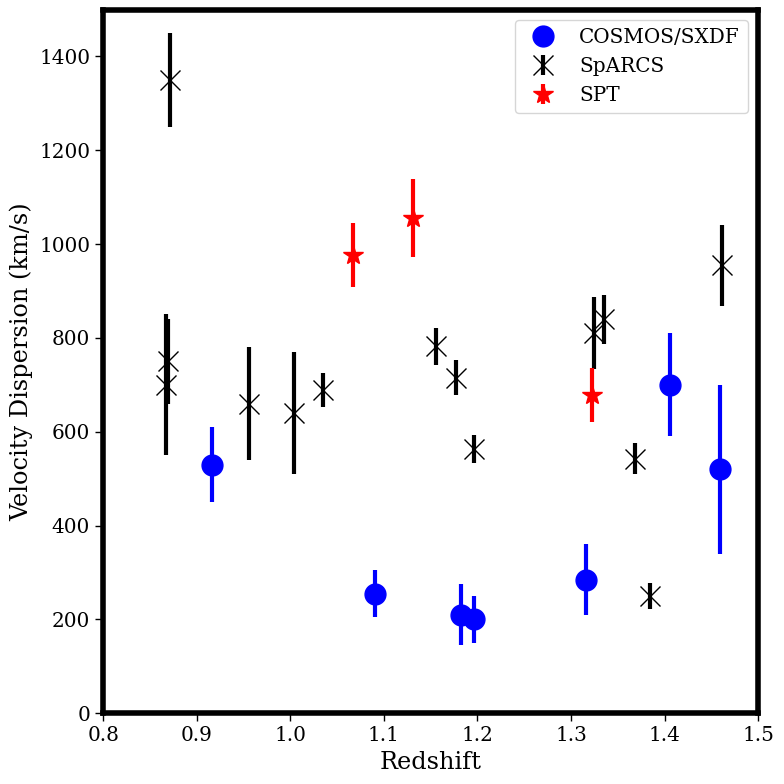

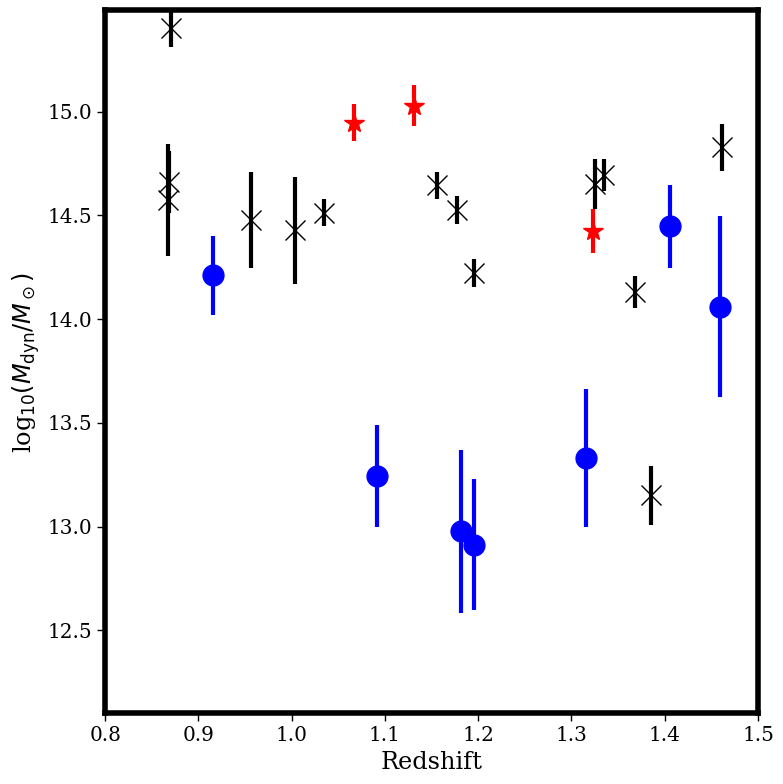

In [15]:

zred, sigma, sigma_err, cluster_id = cluster_table[['Redshift','vdisp','vdisp_err','cluster_id']].values.T

groups = np.where( (cluster_id == 13) | (cluster_id == 14) )
sparcs = np.where( ((cluster_id>3) & (cluster_id<13)) | (cluster_id>14) )
spt = np.where( (cluster_id<=3) )

fig, ax = plt.subplots(figsize=(8,8))

ax.errorbar( zred[groups], sigma[groups], sigma_err[groups], fmt='o', ms=15, label='COSMOS/SXDF', c='b')
ax.errorbar( zred[sparcs], sigma[sparcs], sigma_err[sparcs], fmt='x', ms=15, label='SpARCS', c='k')
ax.errorbar( zred[spt], sigma[spt], sigma_err[spt], fmt='*', ms=15, label='SPT', c='r')
ax.legend()
ax.set_xlim(0.8,1.5)
ax.set_ylim(0,1499)
ax.set_ylabel('Velocity Dispersion (km/s)')
ax.set_xlabel('Redshift')
fig.show()

(Saro_A,Saro_B,Saro_C) = (939,2.91,0.33)
hz = cosmo.H(zred)
h70 = hz.value / 100.
lSaro_Mass = 15. + Saro_B * np.log10( sigma / (Saro_A*h70**Saro_C) )
dM = Saro_B * sigma_err / sigma / (np.log(10))

fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(zred[groups], lSaro_Mass[groups], dM[groups], fmt='o', ms=15, label='COSMOS/SXDF', c='b')
ax.errorbar(zred[sparcs], lSaro_Mass[sparcs], dM[sparcs], fmt='x', ms=15, label='SpARCS', c='k')
ax.errorbar(zred[spt], lSaro_Mass[spt], dM[spt], fmt='*', ms=15, label='SPT', c='r')
ax.set_xlim(0.8,1.5)
ax.set_ylim(12.1,15.49)
ax.set_ylabel(r'log$_{10} (M_{\rm dyn}/M_\odot)$ ')
ax.set_xlabel('Redshift')
fig.show()

## UVJ colours with membership

Generate Figure 2:  UVJ diagram showing spectroscopic members and nonmembers

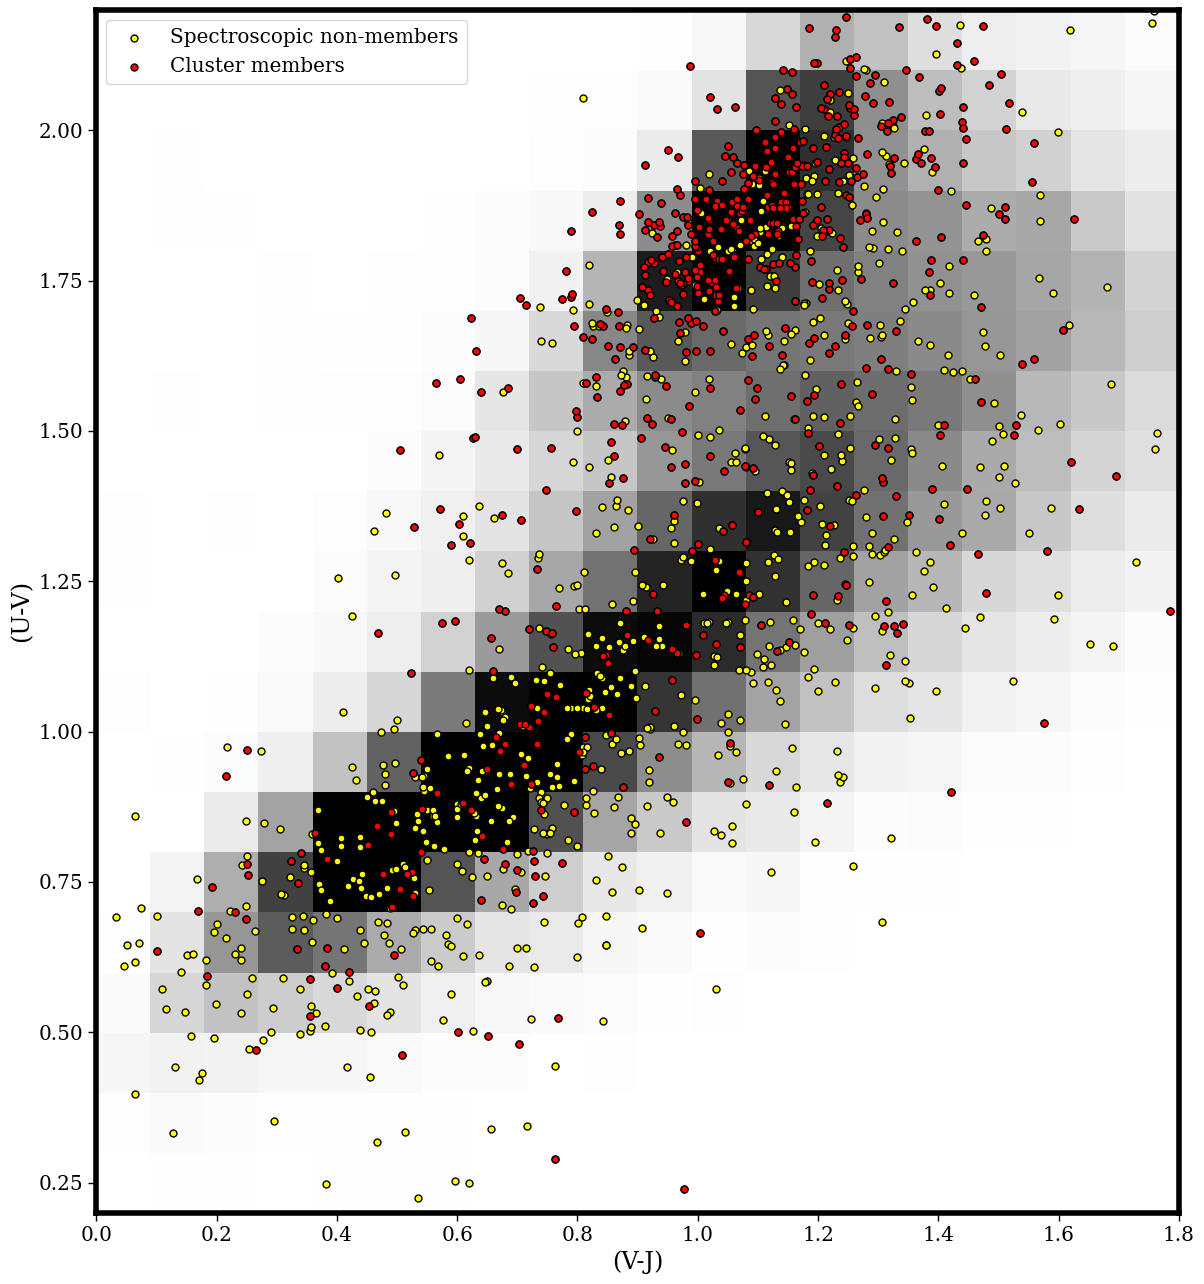

In [16]:
bin_range = ([0,1.8],[0.2,2.2])
cmap = 'gray_r'

# use full photometric catalogue
selection = '(zphot>0.8) & (zphot<1.5) & (Mstellar>10**9.5) & (Mstellar<10**12)'
UminV,VminJ,photz,mass = phot_table.query(selection)[['UMINV','VMINJ','zphot','Mstellar']].values.T
lmass = np.log10(mass)

selection = '(Redshift_Quality>2) & (Redshift>=0.8) & (Redshift<=1.5)'
UminVspec,VminJspec,mem = matched_table.query(selection)[['UMINV','VMINJ','member']].values.T

# Show in greyscale all galaxies with stellar mass between 9.5 and 12, and photo-z between 0.8 and 1.5
Nbins = 20
N,xedges,yedges = np.histogram2d( VminJ, UminV, bins=Nbins, range=bin_range)
N = N.T
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(xedges, yedges)

fig,ax=plt.subplots(1,1,figsize=(13,13))

field = ax.imshow(N, interpolation='nearest', origin='lower',cmap=cmap,vmin=0,vmax=800,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

ax.scatter(VminJspec, UminVspec, c='yellow', edgecolor='k', alpha=1, s=25, label='Spectroscopic non-members')

ax.scatter(VminJspec[mem==1], UminVspec[mem==1], c='red', edgecolor='k', alpha=1, s=25, label='Cluster members')

ax.legend()
ax.set_ylim(0.2,2.2)
ax.set_xlim(0,1.8)
ax.set_xlabel("(V-J)")
ax.set_ylabel("(U-V)")
fig.show()

##  Compare spectroscopic and photometric redshifts
Generate Figure 4:  Difference between specz and photoz 

Outliers: 0.2176
rms:  0.0562
Outliers: 0.1336
rms:  0.0537
Outliers: 0.0450
rms:  0.0440


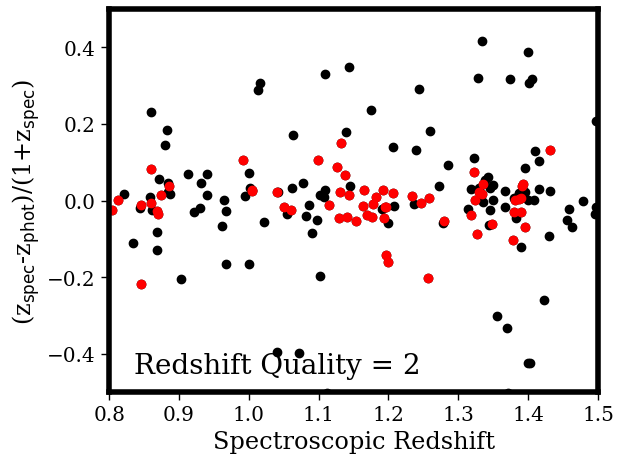

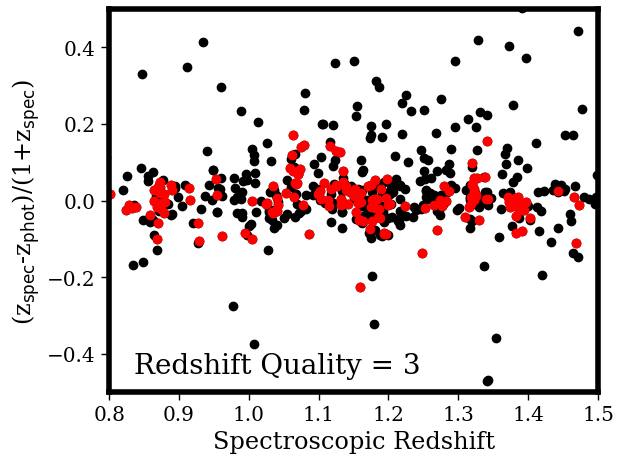

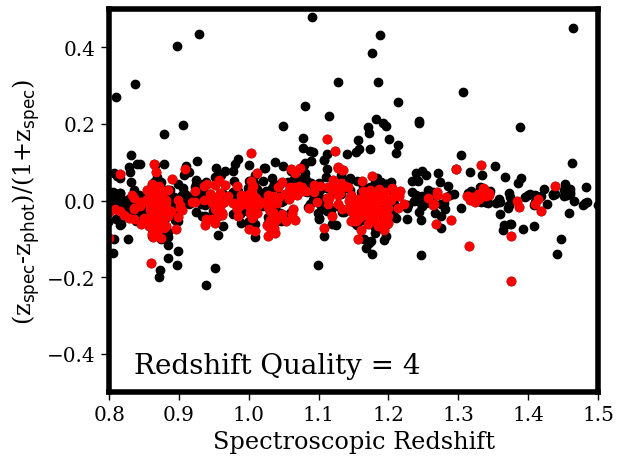

In [17]:
def zspeczphot(qflag1=3, qflag2=10):
    selection = '(zphot>0) & (Redshift>=0.7) & (Redshift<=1.5) & (Redshift_Quality>={}) & (Redshift_Quality<={})'.format(qflag1, qflag2)
    zspec, zphot, uminv, vminj = matched_table.query(selection)[['Redshift','zphot','UMINV','VMINJ']].values.T
    
    quiescent = np.where( (vminj<1.5) & (uminv>1.3) & (uminv>vminj*0.88+0.59))
    dz = (zspec-zphot)/(1.+zspec)
    outlier = np.where(np.abs(dz) > 0.15)
    good = np.where(np.abs(dz) <= 0.15)
    N = np.size(zspec)
    Noutlier = np.size(zspec[outlier])
    print ('Outliers: {:.4f}'.format(Noutlier*1./N))
    print ('rms:  {:.4f}'.format(np.std(dz[good])))
    
    fig,ax = plt.subplots()
    ax.scatter(zspec, dz, c='k', marker='o')
    ax.scatter(zspec[quiescent], dz[quiescent], c='r')
    
    if (qflag1 == qflag2): label = 'Redshift Quality = {}'.format(qflag1)
    else: label = '{}<Redshift Quality<{}'.format(qflag1,qflag2)
    ax.text(0.05,0.05, label, transform=ax.transAxes, fontsize=20)

    ax.set_xlim(0.8,1.5)
    ax.set_ylim(-0.5,0.5)
    ax.set_ylabel(r'(z$_{\rm spec}$-z$_{\rm phot}$)/(1+z$_{\rm spec}$)')
    ax.set_xlabel('Spectroscopic Redshift')
    fig.show()
    
zspeczphot(qflag1=2, qflag2=2)
zspeczphot(qflag1=3, qflag2=3)
zspeczphot(qflag1=4, qflag2=4)

## Redshift success
Similar to Figure 7 in the paper, showing the fraction of good redshifts as a function of magnitude and photometric redshift, for galaxies with S/N>1 at 8500A.  Note the paper used S/N measured at 8600A so is slightly different.  Further along in this notebook we will calculate S/N at other wavelengths and then recreate Fig 7 exactly.

(22.0, 24.25, 0.0, 1.0)

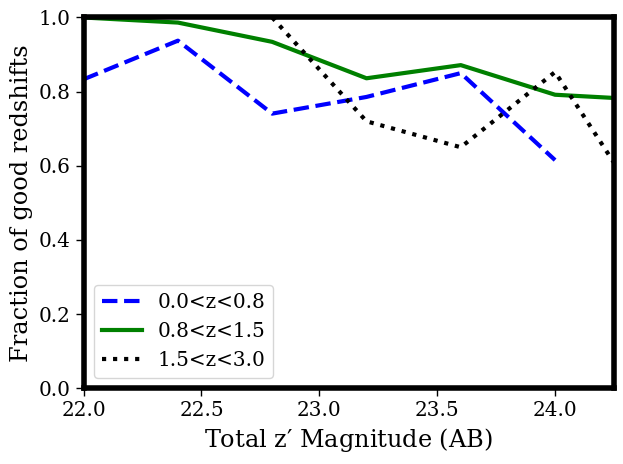

In [18]:
snrlim=1.0
zp=np.array([(0,0.8),(0.8,1.5),(1.5,3)])
colours=np.array(['blue','green','k','red','magenta'])
lines=np.array(['dashed','solid','dotted'])
nbins=10

gogreen_select=(matched_table['OBJClass']==1)  & (matched_table['SNR_8500_VAR']>snrlim) & (matched_table['Spec_Flag']<2)
goodz=(matched_table['Redshift_Quality']>=3)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
cindex=-1
mag=-2.5*np.log10(matched_table['z_tot'])+25
zphot=matched_table['zphot']
for (z1,z2) in zp:
    cindex=cindex+1
    zselect=(zphot>z1) & (zphot<=z2)
    zall,bins=np.histogram(mag[gogreen_select & zselect],bins=nbins,range=(21,25))
    zgood,bins=np.histogram(mag[gogreen_select & goodz & zselect],bins=nbins,range=(21,25))
    xmid=0.5*(bins[1:]+bins[:-1])

    select=np.where(zall>5)
    plt.plot(xmid[select],zgood[select].astype('float')/zall[select],label=str(z1)+"<z<"+str(z2),c=colours[cindex],linestyle=lines[cindex])
plt.xlabel(r"Total z$\prime$ Magnitude (AB)")
plt.legend()
plt.ylabel("Fraction of good redshifts")
ax.axis([22,24.25,0.,1.0])

## Stellar mass and redshift distribution
Figure 9 in Data Release paper

Text(0.5, 0, 'Redshift')

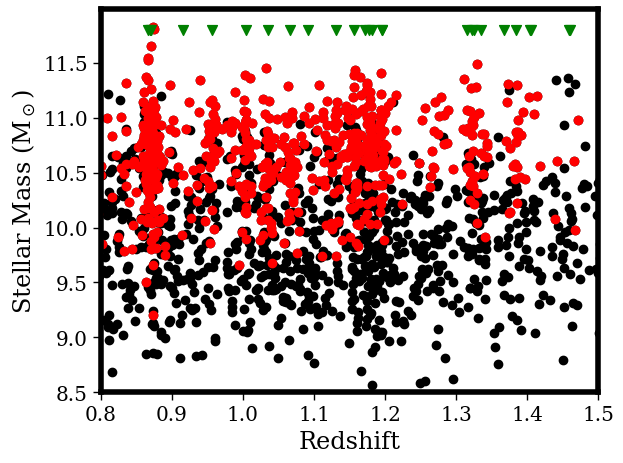

In [19]:
select = '(Redshift_Quality>{})'.format(2)
redshift,mass,UV,VJ=phot_table.query(select)[['zspec','Mstellar','UMINV','VMINJ']].values.T
lmass=np.log10(mass)
Quiescent=((VJ<1.5) & (UV>1.3) & (UV>VJ*0.88+0.59))
fig,ax=plt.subplots()
ax.scatter(redshift,lmass,c='k',marker='o')
ax.scatter(redshift[Quiescent],lmass[Quiescent],c='r')
ax.set_xlim(0.8,1.5)
ax.set_ylim(8.5,11.99)
cm=cluster_table['Redshift']*0+11.8
ax.scatter(cluster_table['Redshift'],cm,marker='v',c='green',s=50)
ax.set_ylabel(r'Stellar Mass (M$_\odot$)')
ax.set_xlabel('Redshift')

## Completeness plots 
Figure 11 in Data Release paper

COSMOS-125 [1.404]
COSMOS-221 [1.196]
COSMOS-28 [1.316]
COSMOS-63 [1.1722]
SPT0205 [1.3227]
SPT0546 [1.0669]
SPT2106 [1.13066]
SXDF49 [1.091]
SXDF64 [0.916]
SXDF76 [1.459]
SXDF76b [1.182]
SXDF87 [1.406]
SpARCS0035 [1.335]
SpARCS0219 [1.325]
SpARCS0335 [1.368]
SpARCS1033 [1.461]
SpARCS1034 [1.385]
SpARCS1051 [1.035]
SpARCS1616 [1.156]
SpARCS1634 [1.177]
SpARCS1638 [1.196]
SpARCS0034 [0.867]
SpARCS0036 [0.869]
SpARCS0215 [1.004]
SpARCS1047 [0.956]
SpARCS1613 [0.871]


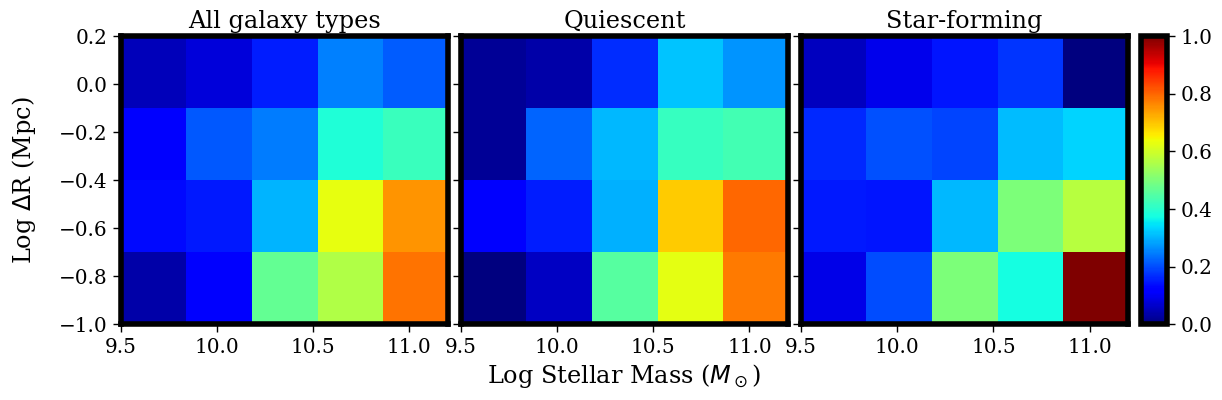

In [20]:
# Define range of stellar masses and log(dr_phys) to plot
range=([9.5,11.2],[-1,0.2])
# Number of bins in each dimension
Nbins=(5,4)
photzrange=0.1
# To look at a single cluster by name
#clusters=np.array(['SpARCS1634'])
# To look at a range of clusters selected by cluster_id
#selection = '(cluster_id>={}) & (cluster_id<{}) '.format(1,2)
#clusters=cluster_table.query(selection)['cluster']
# To combine all clusters:
clusters=None
cmap='jet'
cnt=0

phot_table['lMstellar']=np.log10(phot_table['Mstellar'])
if clusters is None: clusters=cluster_table['cluster']
for cluster in clusters:
    cselection = '(cluster=="{}")'.format(cluster)
    cluster_z,cluster_RA,cluster_DEC=cluster_table.query(cselection)[['Redshift','RA_Best','DEC_Best']].values.T
    clusterpos=SkyCoord(ra=cluster_RA*u.deg,dec=cluster_DEC*u.deg,frame='icrs') 
    print (cluster,cluster_z)
    cnt+=1
    # This doesn't match what is in the paper.  Need l68 and u68.
    phot_table['dz_u']=phot_table['zphot_u68']-cluster_z
    phot_table['dz_l']=phot_table['zphot_l68']-cluster_z
    photselect='(lMstellar>{}) & (lMstellar<{}) & (dz_l<0) & (dz_u>0) & (Star<{})'.format(range[0][0],range[0][1],1)
    specselect='(lMstellar>{}) & (lMstellar<{}) & (dz_l<0) & (dz_u>0) & (Star<{}) & (Redshift_Quality>={})'.format(range[0][0],range[0][1],1,3)
    catpos=SkyCoord(ra=phot_table.query(photselect)['ra'].values.T*u.deg,dec=phot_table.query(photselect)['dec'].values.T*u.deg,frame='icrs') 
    UV=phot_table.query(photselect)['UMINV'].values.T
    VJ=phot_table.query(photselect)['VMINJ'].values.T
    ZQ=phot_table.query(photselect)['Redshift_Quality'].values.T
    masses=phot_table.query(photselect)['lMstellar'].values.T

    dr=catpos.separation(clusterpos)
    DA=cosmo.angular_diameter_distance(cluster_z)
    dr_phys=dr.radian*DA
    dr_phys=np.log10(dr_phys.value+0.0001)

    withspec=(ZQ>=3)
    Quiescent=((VJ<1.5) & (UV>1.3) & (UV>VJ*0.88+0.59))
    # Bin by radius and stellar mass
    N,xedges,yedges=np.histogram2d(masses,dr_phys,bins=Nbins,range=range)
    Nq,xqedges,yqedges=np.histogram2d(masses[Quiescent],dr_phys[Quiescent],bins=Nbins,range=range)

    Ns,xedges,yedges=np.histogram2d(masses[withspec],dr_phys[withspec],bins=Nbins,range=range)
    Nqs,xqedges,yqedges=np.histogram2d(masses[withspec & Quiescent],dr_phys[withspec & Quiescent],bins=Nbins,range=range)

    # There's certainly a more elegant way to do this but I don't know what it is.
    if (cnt==1):
        Ntotal=N.T
        Nqtotal=Nq.T
        Nstotal=Ns.T
        Nqstotal=Nqs.T
    else:
        Ntotal+=N.T
        Nqtotal+=Nq.T
        Nstotal+=Ns.T
        Nqstotal+=Nqs.T
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(xedges, yedges)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,4),sharey=True,sharex=True)
cbax=fig.add_axes([0.91,0.16,0.02,0.72])
fig.subplots_adjust(wspace=0.04,bottom=0.16)
#print (Ntotal,Nstotal)
#print (Nqtotal,Nqstotal)
H=Nstotal/Ntotal
Hq=Nqstotal/Nqtotal
HSF=(Nstotal-Nqstotal)/(Ntotal-Nqtotal)
all=ax1.imshow(H, interpolation='nearest', origin='lower',cmap=cmap,vmin=0,vmax=1,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax1.set_aspect('auto')
ax1.set_title('All galaxy types')
Q=ax2.imshow(Hq, interpolation='nearest', origin='lower',cmap=cmap,vmin=0,vmax=1,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax2.set_aspect('auto')
ax2.set_title('Quiescent')
SF=ax3.imshow(HSF, interpolation='nearest', origin='lower',cmap=cmap,vmin=0,vmax=1,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax3.set_aspect('auto')
ax3.set_title('Star-forming')
ax1.set_ylabel(r"Log $\Delta$R (Mpc)",labelpad=15)
ax2.set_xlabel(r"Log Stellar Mass ($M_\odot$)")
fig.colorbar(all,cax=cbax)
fig.set_tight_layout(False)
fig.show()

## The following scripts require access to more than just the main catalogues

## Plot spectrum
This requires access to the 1D spectra, in SPECTROSCOPY/OneD

In [21]:
# Here I'm going to query the dataframe to find an object, and eventually pull up its spectrum
obj = redshift_table.query('(Cluster == "{}") & (EXTVER == {})'.format('SpARCS0219', 1))
print(obj)

        Cluster     SPECID  RA(J2000)  DEC(J2000)  OBJClass  Redshift  \
950  SpARCS0219  105000004  34.956791   -5.569709         1   1.21954   

     Redshift_Quality  EXTVER  Spec_Flag  SNR_8500_VAR  SNR_8500_RMS  \
950                 3       1        0.0      3.399572      1.096682   

        D4000    eD4000      EWOII    eEWOII  EWHdelta  eEWHdelta  \
950  0.944131  0.063952  30.157173  9.852828  -2.70948   5.512758   

     EWOII_model  eEWOII_model         F_OII        eF_OII  member_Clean  \
950    60.574837      8.493174  1.381500e-16  1.925109e-17           0.0   

     member_EM  member  
950        0.0     0.0  


In [22]:
def get_wavelength_from_hdu(hdr):
    """
    get_wavelength_from_hdu(hdr)

    :param hdu: Fits table header

    Reads 'CRVAL1' 'NAXIS1' and 'CD1_1' to compute wavelength coverage
    """
    return np.arange(hdr['CRVAL1'], hdr['CRVAL1']+hdr['NAXIS1']*hdr['CD1_1'], hdr['CD1_1'])

def get_spectrum(hdu, extver, units='fl', return_frame='observed', redshift=0., objclass=None, bounds=None):
    """
    get_spec(hdu, index, index_var, z=0., scale=1.e-15, bounds=None, units='Fl')

    :param hdu:       Fits table hdu object
    :param index:     Extension of science frame
    :param index_var: Extension of variance frame
    :param return_frame:  What frame to return the wavelength units in. If 'rest', a redshift is required.
    :param redshift:  Redshift of galaxy to convert to rest-frame, if redshift = 0 returns observed-frame
    :param units:     Units of output spectrum, case insensitive

    :type units:      string, "Fl" or "Jy"
    :returns:         wavelengths, the spectrum, and the variance

    Access spectrum from fits file, convert to specified units in rest frame

    Note: Input spectrum must be in units erg cm^-2 s^-1 A^-1
    Note: Header values must give wavelength in Angstroms
    """
    import astropy.units as u

    extver = int(extver)

    units = units.lower()
    assert units in ['fl','maggies','fnu'], 'Error, units must be "Fl" or "maggies"'
    return_frame = return_frame.lower()
    assert return_frame in ['rest','observed'], 'Error, return_frame must be either "rest" or "observed"'

    scale = hdu['SCI',extver].header['FLUXSCAL']
    spec = hdu['SCI',extver].data / scale
    var = hdu['VAR',extver].data / scale**2
    lam = get_wavelength_from_hdu(hdu['SCI',extver].header)

    if objclass==4:
        spec, var = fix_bad_gclass_spec(lam, spec, var, bounds, frame='observed', redshift=redshift)

    if return_frame == 'rest': # convert from observed to rest wavelength
        assert redshift >= 0, 'ERROR: redshift must be positive, is {}'.format(redshift)
        from astropy.cosmology import WMAP9 as cosmo

        dl = (cosmo.luminosity_distance(redshift).to(u.pc).value / 10.)**(-2)
        spec *= (1. + redshift) / dl
        var *= ((1. + redshift) / dl)**2
        lam /= (1. + redshift)

    if units == "maggies":
        convers = (3.34e4 * lam**2)/3631.
        spec *= convers
        var *= convers**2
    elif units == "fnu":
        convers = (3.34e4 * lam**2)
        spec *= convers
        var *= convers**2

    return lam, spec, var


In [23]:
# dataframes often work better when you know its index. 
# Add '.index' at the end to return a 'list' of the indices that match your query
obj = redshift_table.query('(Cluster=="{}") & (SPECID == {})'.format('SpARCS0219', 105000004))
obj_index = obj.index.values[0] # take the first index value

# Open the fits table and get the spectrum in the observed frame
# This code is written with a few options: 
#       return_frame = observed or rest (need a redshfit)
#       units = Fl or Maggies 

fits_path = oneddir+'SpARCS0219_final.fits'

with fits.open(fits_path) as hdu:
    lam, spec, var = get_spectrum(hdu, redshift_table.loc[obj_index,'EXTVER'], return_frame='observed') # get observed frame spectra


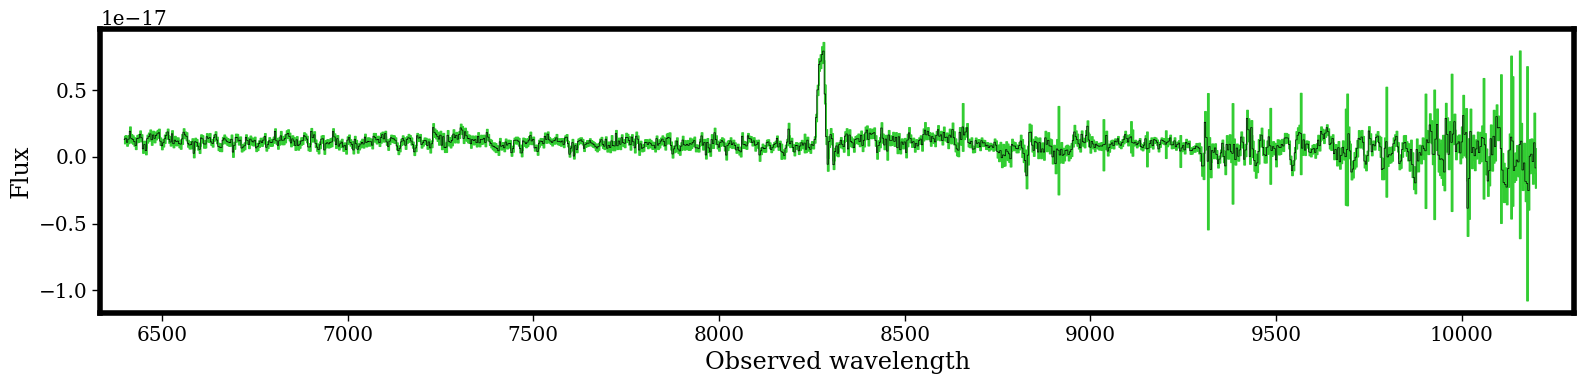

In [24]:
fig, ax = plt.subplots(1,1, figsize=(16,4))
ax.step(lam, spec, color='k', where='mid', lw=0.5)
ax.fill_between(lam, spec+np.sqrt(var), spec-np.sqrt(var), alpha=1, color='limegreen', step='mid')
ax.set(xlabel='Observed wavelength', ylabel='Flux', yscale='linear', 
       xlim=[0.99*np.min(lam), np.max(lam)/0.99])
plt.show()

## Redshift success as a function of spectral SNR
Fig 6 in Data Release paper.  Requires measuring the S/N at different wavelengths.
First, a routine to calculate the S/N at different wavelengths, and save it to a file.  We can either take the noise from the VAR array (SNR_VAR) or measure the RMS in the spectrum at the wavelength of interest (SNR_RMS)

In [25]:
def recalcSNR(snr_central=np.arange(8000,9801,200),dwave=200):
    oldcluster='None'
    outfilename=catdir+'SNR.txt'
    outfile=open(outfilename,"w+")
    outfile.write("#Cluster EXTVER SPECID ")
    for w in snr_central:
        outfile.write("SNR_"+str(w)+"_VAR SNR_"+str(w)+"_RMS ")
    outfile.write("\n")
    for i in np.arange(np.size(redshift_table['SPECID'])):
        cluster=redshift_table['Cluster'][i]
        ext=redshift_table['EXTVER'][i]
        specid=redshift_table['SPECID'][i]
        if cluster!=oldcluster:
            try:
                MEF.close()
            except:
                pass
            oldcluster=cluster
            onedfile=oneddir+cluster+'_final.fits'
            MEF=fits.open(onedfile)
        signal=MEF['sci',ext].data
        variance=MEF['var',ext].data
        header=MEF['sci',ext].header
        crval1=header['CRVAL1']
        crpix1=header['CRPIX1']
        cd1_1=header['CD1_1']
        outfile.write("%s %d %d " % (cluster,ext,specid))
        for w in snr_central:
            wave=np.array([w-dwave,w+dwave])
            pix=((wave-crval1)/cd1_1+crpix1).astype(int)
            snr_var=np.average(signal[pix[0]:pix[1]]/np.sqrt(variance[pix[0]:pix[1]]))        
            if ((np.std(signal[pix[0]:pix[1]]))>0):
                snr_rms=np.average(signal[pix[0]:pix[1]])/np.std(signal[pix[0]:pix[1]])
            else:
                snr_rms=0
            outfile.write("%f %f " % (snr_var,snr_rms))
        outfile.write("\n")
    outfile.close()

In [26]:
recalcSNR()

## Redshift success Part II
Now we can make Figure 7 in the paper, by restricting to galaxies with S/N>1 at 9600 A. 

(22.0, 24.25, 0.0, 1.0)

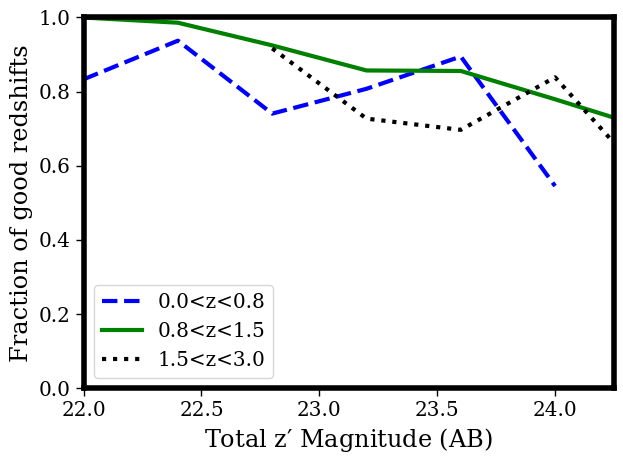

In [27]:
snrlim=1.0
snrwave=9600
zp=np.array([(0,0.8),(0.8,1.5),(1.5,3)])
colours=np.array(['blue','green','k','red','magenta'])
lines=np.array(['dashed','solid','dotted'])
nbins=10

snrfile=catdir+'SNR.txt'
snrdata=ascii.read(snrfile)
snr_rms=snrdata['SNR_'+str(snrwave)+'_RMS']
snr_var=snrdata['SNR_'+str(snrwave)+'_VAR']
gogreen_select=(matched_table['OBJClass']==1)  & (snr_var>snrlim) & (matched_table['Spec_Flag']<2)
goodz=(matched_table['Redshift_Quality']>=3)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
cindex=-1
mag=-2.5*np.log10(matched_table['z_tot'])+25
zphot=matched_table['zphot']
for (z1,z2) in zp:
    cindex=cindex+1
    zselect=(zphot>z1) & (zphot<=z2)
    zall,bins=np.histogram(mag[gogreen_select & zselect],bins=nbins,range=(21,25))
    zgood,bins=np.histogram(mag[gogreen_select & goodz & zselect],bins=nbins,range=(21,25))
    xmid=0.5*(bins[1:]+bins[:-1])

    select=np.where(zall>5)
    plt.plot(xmid[select],zgood[select].astype('float')/zall[select],label=str(z1)+"<z<"+str(z2),c=colours[cindex],linestyle=lines[cindex])
plt.xlabel(r"Total z$\prime$ Magnitude (AB)")
plt.legend()
plt.ylabel("Fraction of good redshifts")
ax.axis([22,24.25,0.,1.0])

# S/N as a function of magnitude for different populations of galaxies
Fig 3 in the Data release paper

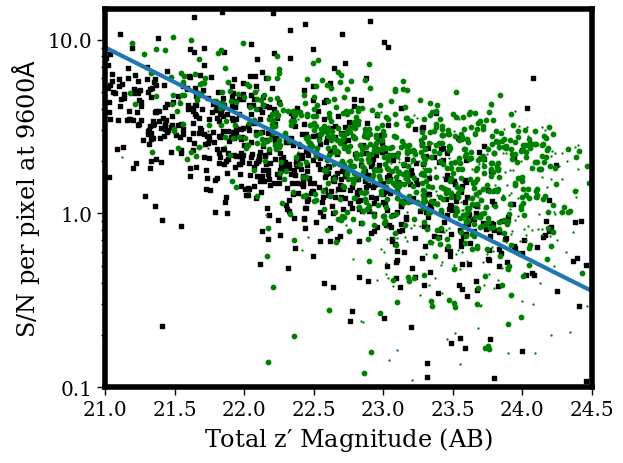

In [28]:
snrwave=9600
snrfile=catdir+'SNR.txt'
snrdata=ascii.read(snrfile)
snr_rms=snrdata['SNR_'+str(snrwave)+'_RMS']
snr_var=snrdata['SNR_'+str(snrwave)+'_VAR']
zmag=-2.5*np.log10(matched_table['z_tot'])+25
flags=matched_table['Spec_Flag']
gogreen_select=(matched_table['OBJClass']==1) 
gclass_select=(matched_table['OBJClass']==4)
goodz=(matched_table['Redshift_Quality']>=3)
fig,ax=plt.subplots()
ax.scatter(zmag[gclass_select & goodz],snr_rms[gclass_select & goodz],c='k',s=5,marker='s')
ax.scatter(zmag[gogreen_select],snr_rms[gogreen_select],c='g',marker='.',s=2)
ax.scatter(zmag[gogreen_select & goodz],snr_rms[gogreen_select & goodz],c='g',s=10)
snlim=(snr_rms>1.0)
x1=zmag[goodz & snlim]
x2=zmag[goodz]
m1=21
m2=24.5
ax.axis([m1,m2,0.1,15])
y1=9
y2=(10.**(-(m2-m1)/2.5))*y1
plt.plot((m1,m2),(y1,y2))
ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(plticker.ScalarFormatter())
plt.ylabel("S/N per pixel at "+str(int(snrwave))+r"$\mathrm{\AA}$")
plt.xlabel(r"Total z$\prime$ Magnitude (AB)")
fig.show()

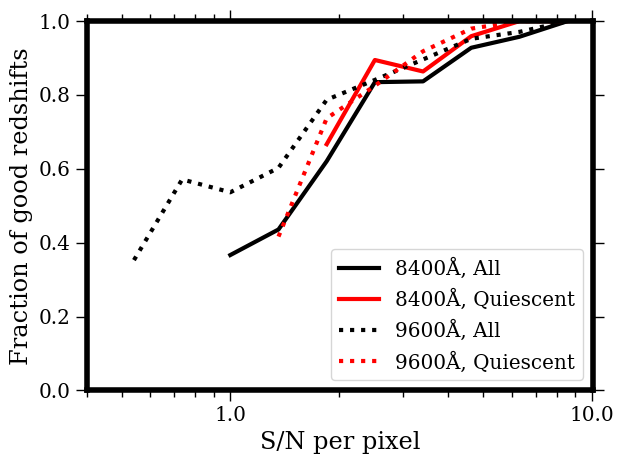

In [22]:
# Specify an array of wavelengths at which you want to measure S/N.  Must correspond to entries in SNR.txt, generated above.
snrwave=np.array([8400,9600])
nbins=15
colours=np.array(['k','red','blue','green'])
lines=np.array(['solid','dotted','dashed'])
snrfile=catdir+'SNR.txt'
snrdata=ascii.read(snrfile)
flags=matched_table['Spec_Flag']
VJ=matched_table['VMINJ']
UV=matched_table['UMINV']
Quiescent=(VJ<1.5) & (UV>1.3) & (UV>VJ*0.88+0.59)
zphot=matched_table['zphot']
gogreen_select=(matched_table['OBJClass']==1) & (flags<2) 
goodz=(matched_table['Redshift_Quality']>=3)  
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
cindex=-1
for snr in snrwave:
    cindex=cindex+1
    snr_var=snrdata['SNR_'+str(snr)+'_VAR']
    zall_var,bins=np.histogram(np.log10(snr_var[gogreen_select]),bins=nbins,range=(-1,1))
    zgood_var,bins=np.histogram(np.log10(snr_var[gogreen_select & goodz]),bins=nbins,range=(-1,1))
    xmid=0.5*(bins[1:]+bins[:-1])
    ok=np.where(zall_var>10)
    plt.semilogx(10.**xmid[ok],zgood_var[ok].astype('float')/zall_var[ok],label=str(np.int(snr))+"Å, All",c='k',linestyle=lines[cindex])
    zall_var,bins=np.histogram(np.log10(snr_var[gogreen_select & Quiescent]),bins=nbins,range=(-1,1))
    zgood_var,bins=np.histogram(np.log10(snr_var[gogreen_select & goodz & Quiescent]),bins=nbins,range=(-1,1))
    xmid=0.5*(bins[1:]+bins[:-1])
    ok=np.where(zall_var>10)
    plt.semilogx(10.**xmid[ok],zgood_var[ok].astype('float')/zall_var[ok],label=str(np.int(snr))+"Å, Quiescent",c='red',linestyle=lines[cindex])
plt.xlabel(r"S/N per pixel")
plt.legend()
ax.get_xaxis().set_major_formatter(plticker.ScalarFormatter())
plt.ylabel("Fraction of good redshifts")
plt.tick_params(which='major', length=8,top='on', bottom='on', left='on', right='on')
plt.tick_params(which='minor', length=5,top='on', bottom='on', left='on', right='on')
ax.axis([0.4,10.1,0.,1.0])
fig.show()


## Plot summary of object data
Here is another example of a routine that will plot the 1D and 2D spectrum, together with the I-band image and some other information, for a given object.  To plot the image it nees access to the PHOTOMETRY/IMAGES/ directory, but it should run without it (you just won't get the image)

In [37]:
def markline(ax, name, wavelength, location, ll, y, y1, y2):
    # adds an annotation with vertical line and label
    doline = True
    assert location.lower() in ['below','above'], 'Error: "location" must be either "below" or "above"'
    try:
        range2 = np.where((ll>wavelength*0.995) & (ll<wavelength*1.005) & (y>0))
        s1 = np.min(y[range2])
        s2 = np.max(y[range2])
    except:
        doline = False
    if doline:
        gap = 0.25*(y2-y1)
        if location is 'below':
            textpos = s1-gap
        elif location is 'above':
            textpos = s2+gap
        ax.annotate(name, xy=(wavelength, s2), xytext=(wavelength,textpos), \
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=0))

def plotspecinspect(table, obj_index,filter='I'):
    import matplotlib.patches as patches
    import matplotlib.transforms as transforms
    import matplotlib.ticker as plticker
    import matplotlib.gridspec as gridspec

    from astropy import wcs
    from astropy.convolution import convolve, Box1DKernel

    import os
    
    # make variables of file names
    cluster = table.loc[obj_index,'Cluster']
    onedfile = oneddir + cluster + '_final.fits'
    twodfile = twoddir + cluster + '_twod.fits.gz'
    imname = table.loc[obj_index,'IMAGE_'+filter].rstrip()
    cdirname = cluster.replace('SPT','SPTCL-').replace('SpARCS','SpARCS-')
    image = imdir + cdirname + '/' + imname + '.fits'
    imageaccess=True
    if not os.path.isfile(image):
        image=image+'.gz'
    if not os.path.isfile(image):
        print ('No image file ',image)
        imageaccess=False

    # Get some key information for this object and assign to useful variable names
    # To use the position from the spectroscopy catalogue (image may not align precisely with overlaid slit position)
    #    cols = ['SPECID','EXTVER','Redshift','zphot','Redshift_Quality','RA(J2000)','DEC(J2000)','OBJClass','PA_deg','z_tot','SNR_8500_VAR']
    # To use position from the photometric catalogue
    cols = ['SPECID','EXTVER','Redshift','zphot','Redshift_Quality','ra','dec','OBJClass','PA_deg','z_tot','SNR_8500_VAR']
    specid, ext, zspec, zphot, Quality, ra, dec, objclass, pa, z_tot, snr_target = table.loc[obj_index,cols].values.T
    radec = np.array([[ra,dec]])
    usephotoz = False # if redshfit quality below 3, use photmetric redshift instead
    
    zmag_target = -2.5 * np.log10(z_tot)+25
    
    if (Quality<3) & ~np.isnan(zphot): # check redshift quality, if <3 use phot (if exists)
        zred = zphot
        usephotoz = True
    else: 
        zred = zspec

    
    # Create figure

    fig = plt.figure(constrained_layout=True, figsize=(4*4, 4*3))
    gs = gridspec.GridSpec(ncols=4, nrows=3, figure=fig, height_ratios=[1,1,0.8])
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2:])
    ax4 = fig.add_subplot(gs[1, :])
    ax5 = fig.add_subplot(gs[2, :])
    
    ##############################
    # 1 - Information panel
    
    info = '\n'.join([ 'SPECID = {}','ZMAG = {:.1f}','SNR = {:.2f}','OBJCLASS = {}','z = {:.3f}'])
    info = info.format(specid, zmag_target, snr_target, objclass, zred)
    if usephotoz: info += '\nUzing photz'
    else: info += '\nz_Q = {}'.format(Quality)
    
    ax1.axis('off')
    ax1.text(x=0, y=0, s=info, fontsize=20)
    
    
    ##############################
    # 2 - Postage stamp from preimage
    if imageaccess:
        # Open file
        with fits.open(image) as imagedat:
            try: 
                im = imagedat[1].data
                im_header = imagedat[1].header
            except:
                im = imagedat[0].data
                im_header = imagedat[0].header

        # from pixel scale, calculate CCD scale
        imagewcs = wcs.WCS(im_header)
        im_xscale = (np.abs(im_header['CD1_1'])+np.abs(im_header['CD1_2']))*3600
        im_yscale = (np.abs(im_header['CD2_1'])+np.abs(im_header['CD2_2']))*3600
        im = im-np.median(im)
        pixels = imagewcs.wcs_world2pix(radec,0)
        yccd, xccd = pixels[0][0], pixels[0][1]

        # Create postage stamp of galaxy
        defstampsize = 5 / im_xscale * np.array([1,1])
        ximage = [int(np.max([xccd-defstampsize[0]/2+.5,0])),int(np.min([xccd+defstampsize[0]/2+.5,np.shape(im)[0]]))]
        yimage = [int(np.max([yccd-defstampsize[1]/2+.5,0])),int(np.min([yccd+defstampsize[1]/2+.5,np.shape(im)[1]]))]
        centralstampsize = 1 / im_xscale * np.array([1,1])
        xcent = [int(np.max([xccd-centralstampsize[0]/2+.5,0])),int(np.min([xccd+centralstampsize[0]/2+.5,np.shape(im)[0]]))]
        ycent = [int(np.max([yccd-centralstampsize[1]/2+.5,0])),int(np.min([yccd+centralstampsize[1]/2+.5,np.shape(im)[1]]))]
        xstamp = xccd-ximage[0]
        ystamp = yccd-yimage[0]

        ax2.axis('off')
        try:
            im_sub = im[ximage[0]:ximage[1],yimage[0]:yimage[1]]
            minval = np.nanmin(im_sub)
            maxval = np.nanmax(im[xcent[0]:xcent[1],ycent[0]:ycent[1]])
            ax2.imshow(im_sub, vmax=0.99*maxval, vmin=minval, cmap=plt.get_cmap('gray'))
        except:
            pass
        # rectangle: xy=(), width, height
        rect = patches.Rectangle(
            (xstamp-1/2./im_xscale, ystamp-2.25/im_yscale),
            1/im_xscale,
            4.5/im_yscale,
            fill=False,
            edgecolor='red')
        obj = patches.Rectangle(
            (xstamp-1./2./im_xscale, ystamp-0.775/im_yscale),
            1/im_xscale,
            1.55/im_yscale,
            fill=False,
            edgecolor='yellow')
        t = transforms.Affine2D().rotate_deg_around(xstamp,ystamp,pa)
        rect.set_transform(t + ax2.transData)
        obj.set_transform(t + ax2.transData)
        ax2.add_patch(rect)
        ax2.add_patch(obj)
        ax2.scatter(xstamp,ystamp,marker = 'x')
        ax2.set_xlim(0,int(defstampsize[0]))
        ax2.set_ylim(0,int(defstampsize[1]))
    
    
    ##############################
    # 3 - SNR vs ZMAG
    ztots, snrs = matched_table.query('OBJClass==1')[['z_tot','SNR_8500_VAR']].values.T
    zmags = -2.5*np.log10(ztots) + 25
    
    ax3.scatter(zmags, snrs, facecolor='none', edgecolor='k', s=50)
    ax3.scatter(zmag_target, snr_target, c='r', s=50)
    ax3.set_yscale('log')
    ax3.get_yaxis().set_major_formatter(plticker.ScalarFormatter())
    ax3.set_ylim(0.2,10)
    ax3.set_xlim(20,24.5)
    ax3.set_ylabel("S/N @ 850nm")
    ax3.set_xlabel("ZMAG")
    
    ##############################
    ##### 4 - OneD spectrum
    
    # open file
    with fits.open(onedfile) as onedspec:
        mdf = onedspec['mdf',1].data
        spectrum = onedspec['sci',ext].data
        header_primary = onedspec[0].header
        
        hd = onedspec['sci',ext].header
        var = onedspec['var',ext].data
        unc = np.sqrt( var )
        
    # calculate wavelength array
    pix = np.arange(1,hd['naxis1']+1)
    ll = hd['crval1']+(pix-hd['crpix1'])*hd['cd1_1']
    
    smoothed = convolve(spectrum,Box1DKernel(5)) # smooth spectrum, just for plotting purposes

    ax4.fill_between(ll, spectrum-unc, spectrum+unc, color='yellow', step='mid' )
    ax4.step(ll, spectrum, c='gray', where='mid')
    ax4.step(ll, smoothed, c='k', where='mid')
    ax4.set_xlim(ll[0],ll[-1])
    y1 = np.nanmean(spectrum[:-200])-2.*np.nanstd(spectrum[:-200])
    y2 = np.nanmean(spectrum[:-200])+5.*np.nanstd(spectrum[:-200])

    ax4.set_ylim(y1,y2)
    ax4.set_xlabel("Observed frame wavelength (A)")

    # add markers of spectral features
    tax4 = ax4.twiny()
    llz = ll/(1.+zred)

    tax4.set_xlim(llz[0], llz[-1])
    tax4.set_xlabel("Rest frame wavelength (A)")
    y1 = np.max([1.e-3,np.min(smoothed)])
    y2 = 1.2*np.max(smoothed)
    
    for label,wl,placement in [['MgII',2800,'above'],
                               ['[OII]',3727,'below'],
                               ['H$\delta$',4102,'above'],
                               ['',4341,'above'],
                               ['H',3970,'above'],
                               ['',3889,'above'],
                               ['',3835,'above'],
                               ["",3797,'above'],
                               ['',3770,'above'],
                               ['CaK',3934,'above'],
                               ['G',4300,'above'],
                               ['FeII',2586,'above'],
                               ['',2600,'above'],
                               ['FeII',2374,'above'],
                               ['',2382.76,'above'],
                               ['FeII',2344,'above'],
                               ['MgI',2850,'above']]:
        
        markline(tax4, label,wl,placement, llz, smoothed, y1, y2)

        
    ##############################
    ##### 4 - TwoD spectrum sky-subtracted slid with trace
    
    # Open 2D spectrum if it exists
    twodexists = True
    with fits.open(twodfile) as twodspec:
        try:
            twod = twodspec['sci',ext].data
        except:
            twodexists = False    

    if twodexists:
        maxval = 0.99*np.nanmax(np.abs(np.nanmedian(twod[2:8,950:1100],1)))
        if (maxval<= 0):
            maxval = 0.99*np.nanmax(np.abs(np.nanmedian(twod,1)))
        extent = [ll[0],ll[-1],1,20]
        ax5.imshow(twod[:,:], extent=extent, origin='lower', aspect=10, vmax=maxval, vmin=-maxval, cmap=plt.get_cmap('gray'))
        ax5.set_xlim(ll[0],ll[-1])
        ax5.set_xlabel("Observed frame wavelength (A)")
        

    fig.show()


Here's an example of how to use this to generate plots for objects selected based on their cluster, redshift quality and z magnitude. By default this i plotting the I-band image but you can change this by specifying a different filter suffix.

Generating plot for specid  101000184
Generating plot for specid  101000354
Generating plot for specid  101000677


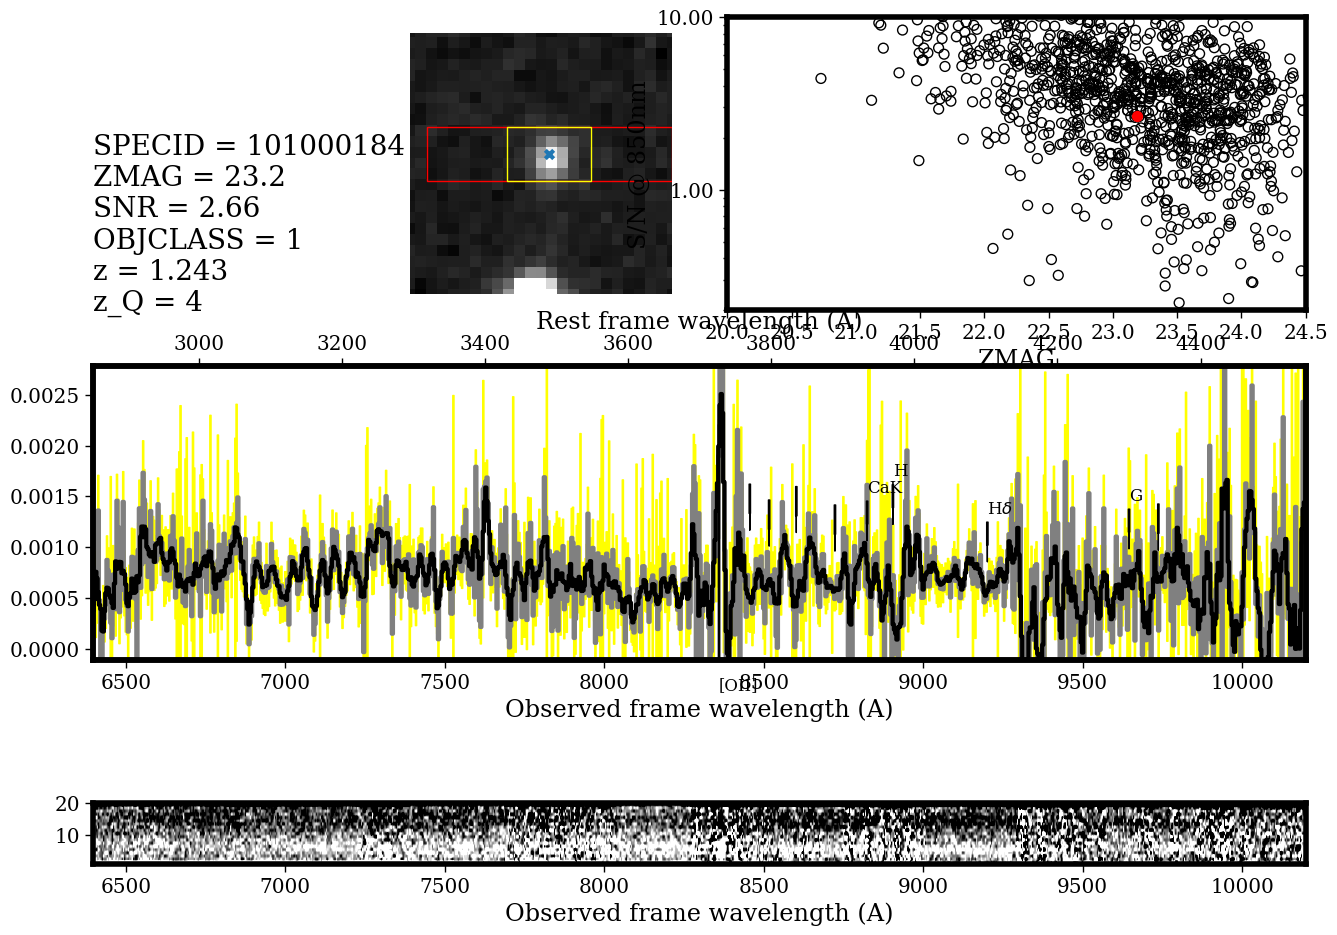

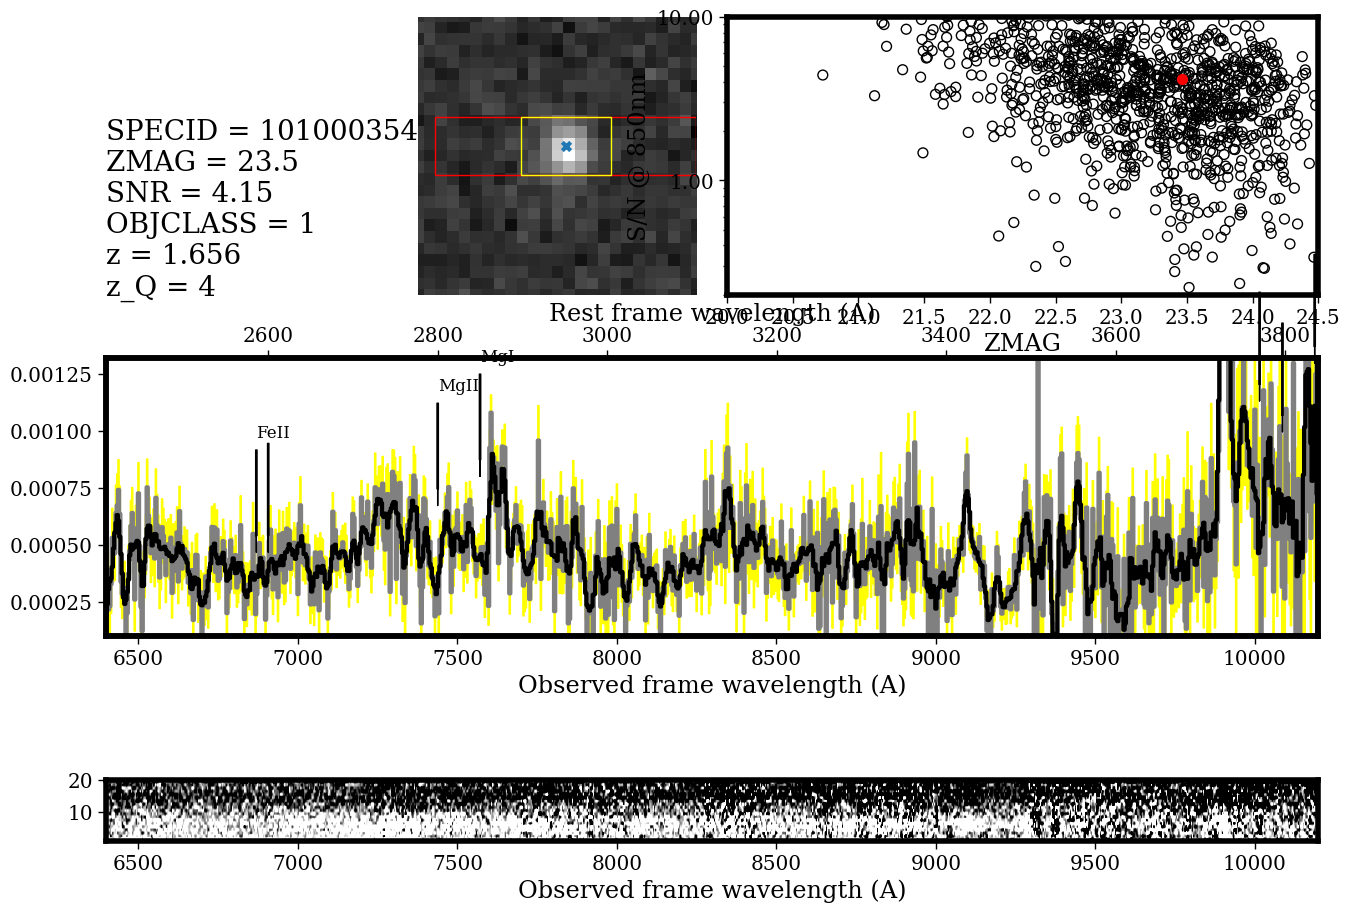

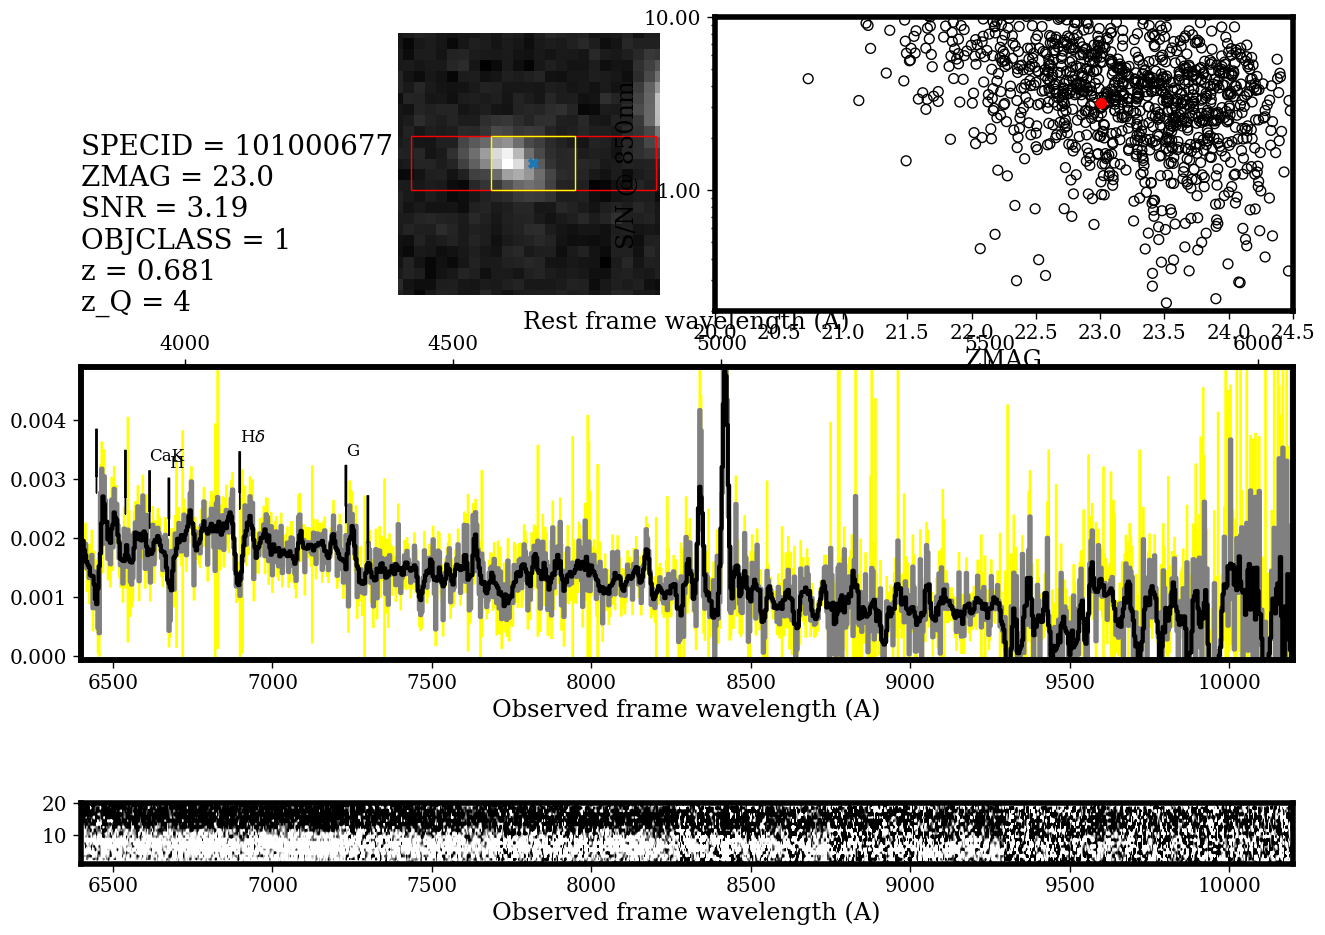

In [38]:
cluster = 'SPT0205'
image_filter='I'
zmaglim = np.array([23.5, 23.0])
zfluxlim = 10.**(-0.4*(zmaglim-25.))

#objs = matched_table.query('(SPECID=="{}")'.format(211060584))
objs = matched_table.query('(Cluster=="{}") & (Redshift_Quality == {}) & (z_tot >= {}) & (z_tot <= {})'.format(cluster, 4,zfluxlim[0],zfluxlim[1]))

for obj_index in objs.index.values:
    print ('Generating plot for specid ',matched_table.loc[obj_index,'SPECID'])
    plotspecinspect(matched_table,obj_index,filter=image_filter)     
    #break